<a href="https://colab.research.google.com/github/hitanshu5/Time-Series/blob/main/TSAEXP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## FB dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.filters.hp_filter import hpfilter
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('FB.csv',parse_dates=True)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-12-08,76.180000,77.250000,75.400002,76.519997,76.519997,25733900
1,2014-12-09,75.199997,76.930000,74.779999,76.839996,76.839996,25358600
2,2014-12-10,76.650002,77.550003,76.070000,76.180000,76.180000,32210500
3,2014-12-11,76.519997,78.519997,76.480003,77.730003,77.730003,33462100
4,2014-12-12,77.160004,78.879997,77.019997,77.830002,77.830002,28091600


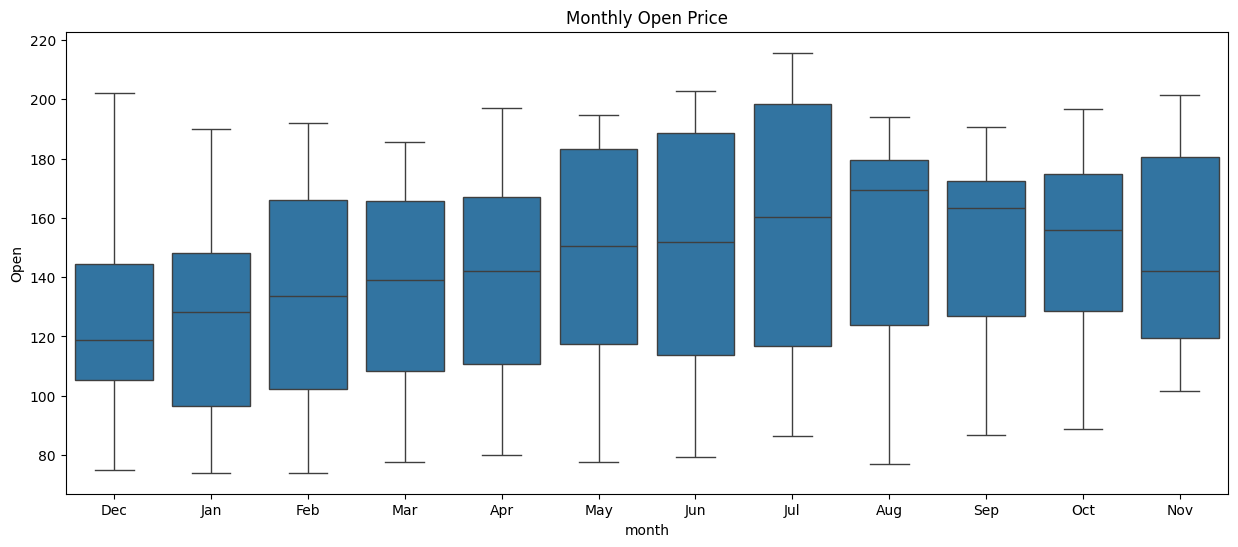

In [3]:
df['Date'] = pd.to_datetime(df['Date'])

df['month'] = df['Date'].dt.strftime('%b')
df['year'] = [d.year for d in df['Date']]
df['month'] = [d.strftime('%b') for d in df['Date']]
years = df['year'].unique()
plt.figure(figsize=(15,6))
sns.boxplot(x='month', y='Open', data=df).set_title('Monthly Open Price')
plt.show()

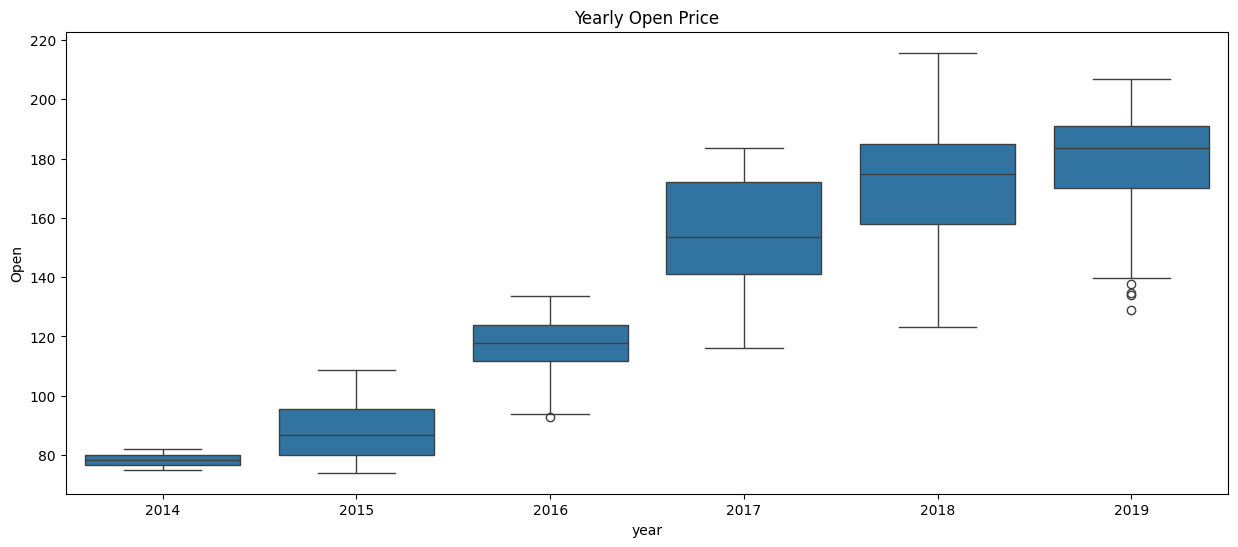

In [4]:
plt.figure(figsize=(15,6))
sns.boxplot(x='year', y='Open', data=df).set_title('Yearly Open Price')
plt.show()

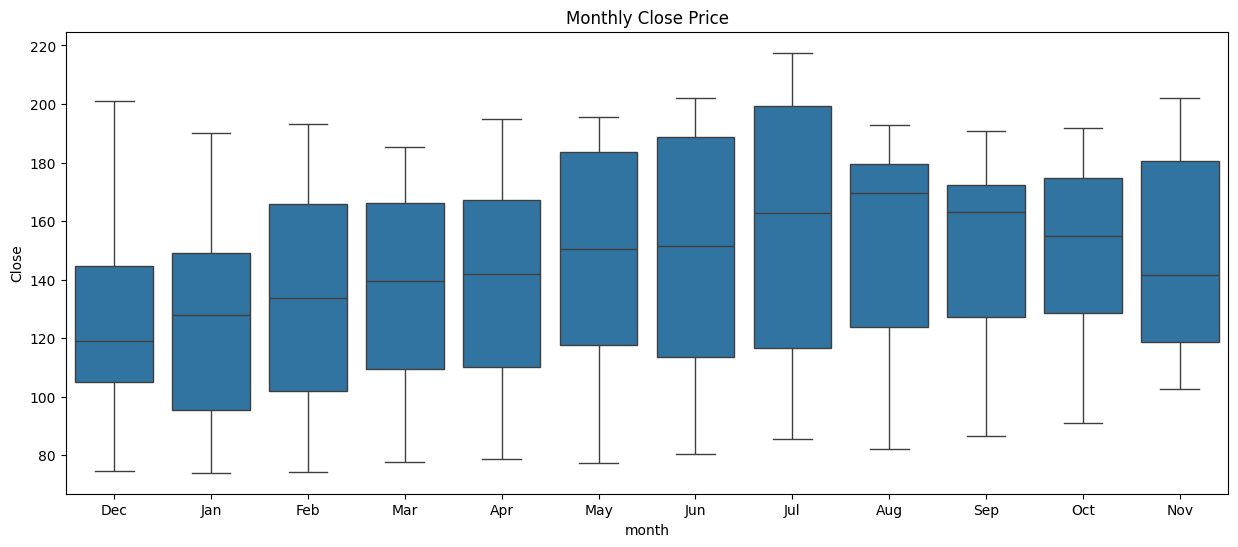

In [5]:
plt.figure(figsize=(15,6))
sns.boxplot(x='month', y='Close', data=df).set_title('Monthly Close Price')
plt.show()

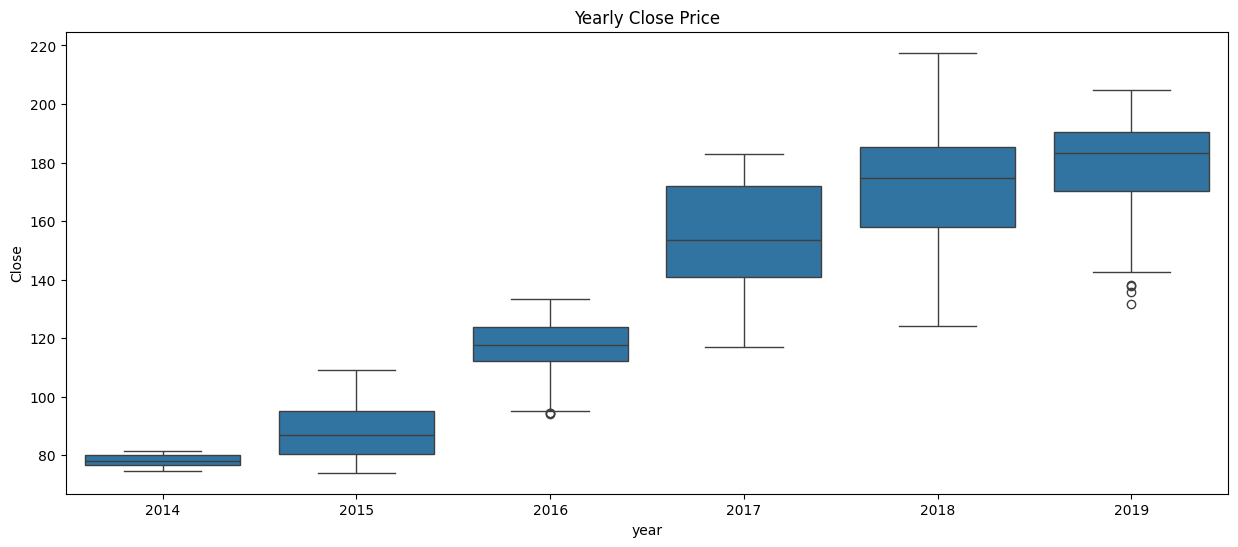

In [6]:
plt.figure(figsize=(15,6))
sns.boxplot(x='year', y='Close', data=df).set_title('Yearly Close Price')
plt.show()

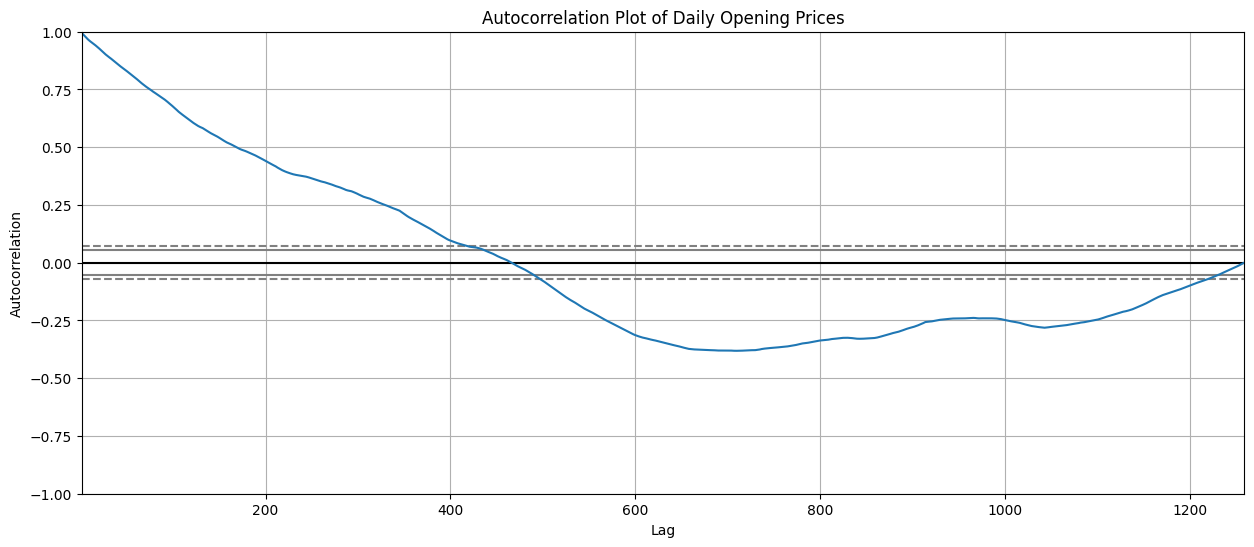

In [7]:
from pandas.plotting import autocorrelation_plot

plt.rcParams.update({'figure.figsize': (15, 6), 'figure.dpi': 100})
autocorrelation_plot(df['Open'])

plt.title('Autocorrelation Plot of Daily Opening Prices')
plt.show()

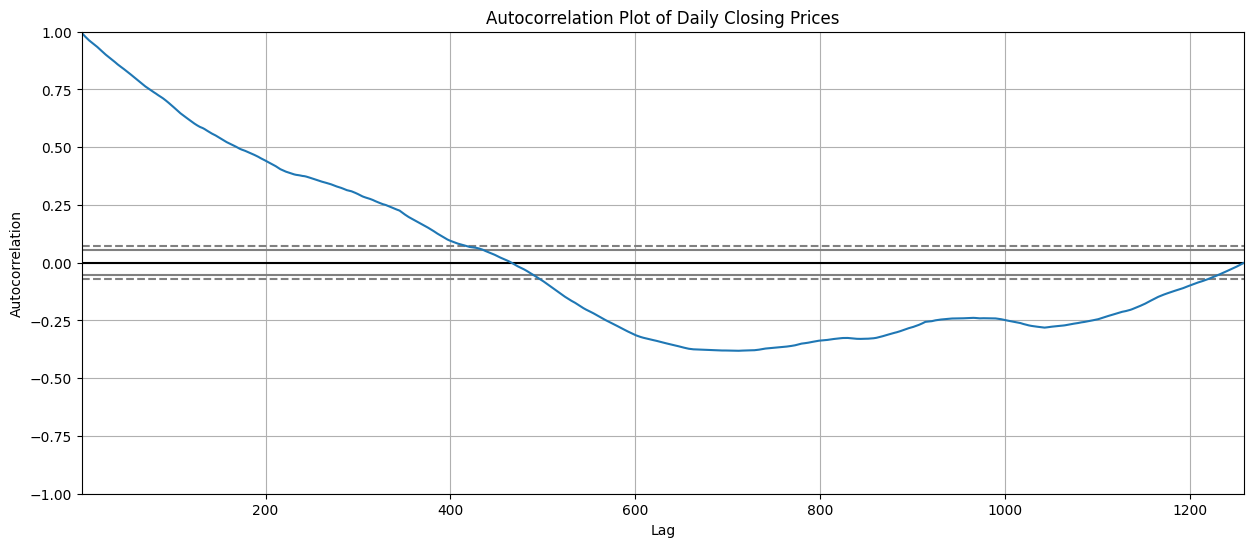

In [8]:
from pandas.plotting import autocorrelation_plot

plt.rcParams.update({'figure.figsize': (15, 6), 'figure.dpi': 100})
autocorrelation_plot(df['Close'])

plt.title('Autocorrelation Plot of Daily Closing Prices')
plt.show()

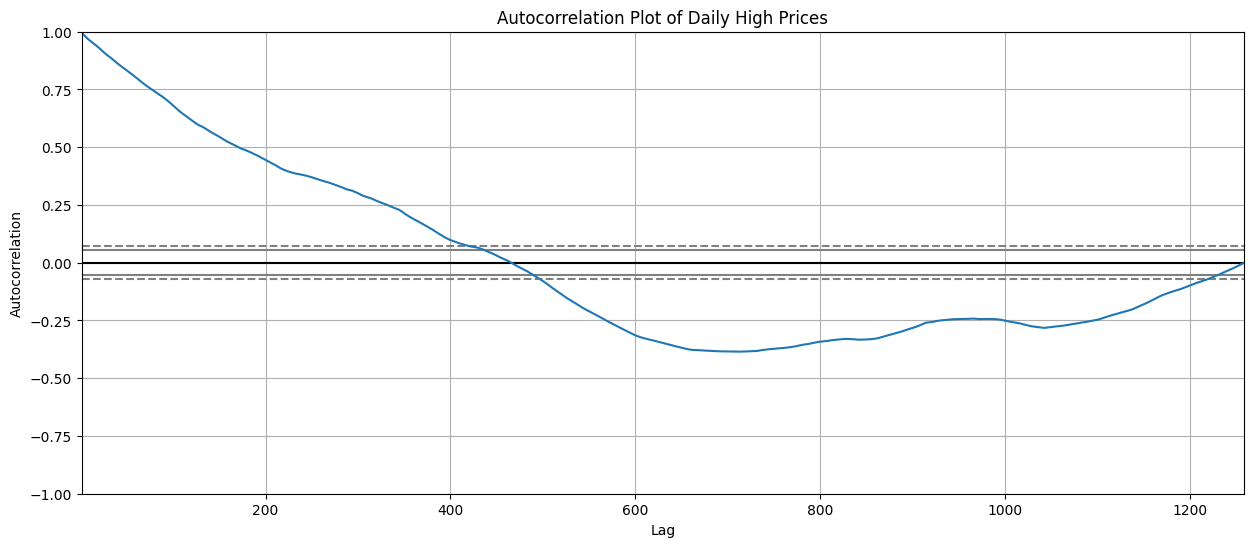

In [9]:
autocorrelation_plot(df['High'])
plt.title('Autocorrelation Plot of Daily High Prices')
plt.show()

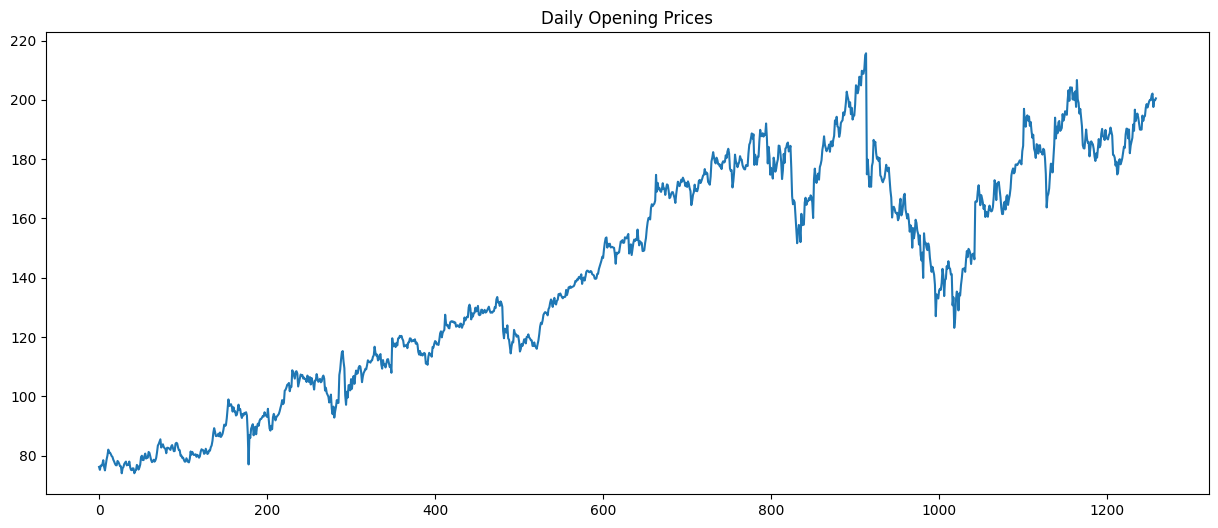

In [10]:
plt.plot(df['Open'])
plt.title('Daily Opening Prices')
plt.show()

#daily open price as per number of days

<Figure size 1500x1000 with 0 Axes>

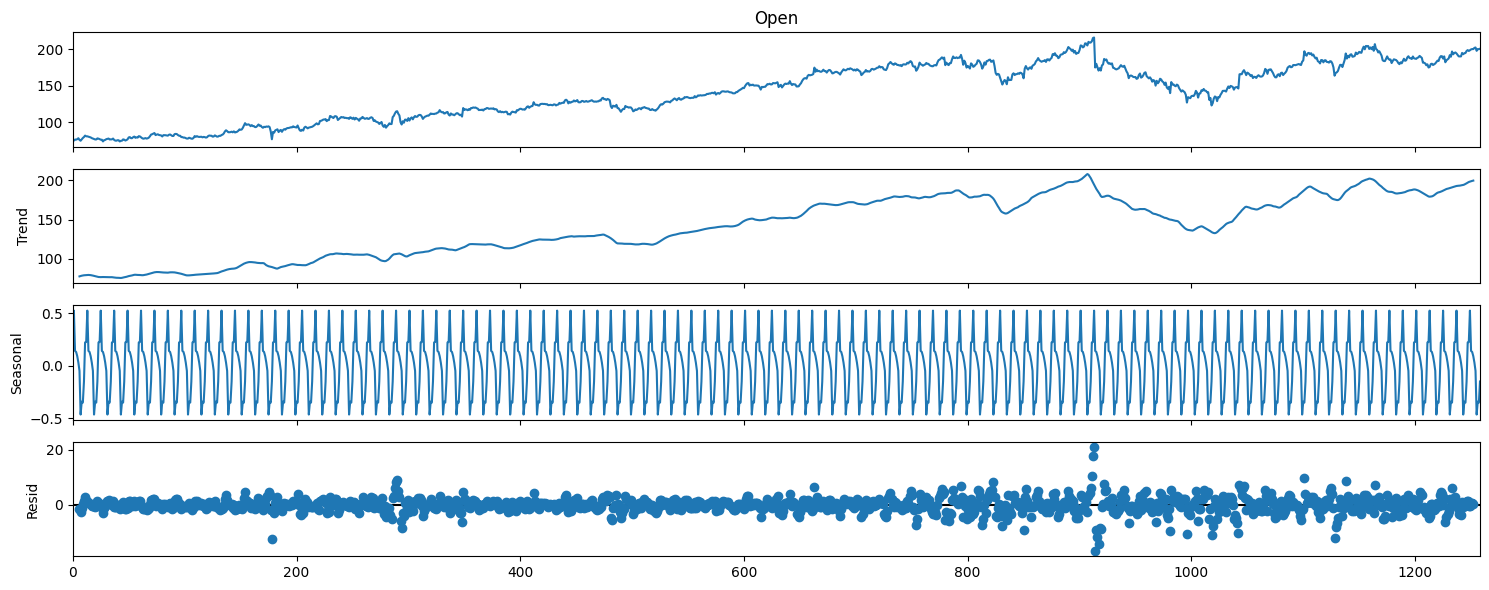

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(15,10))
result = seasonal_decompose(df['Open'], model='additive', period=12)
result.plot()
plt.show()

#Additive model on daily open price with period 12

<Figure size 1500x1000 with 0 Axes>

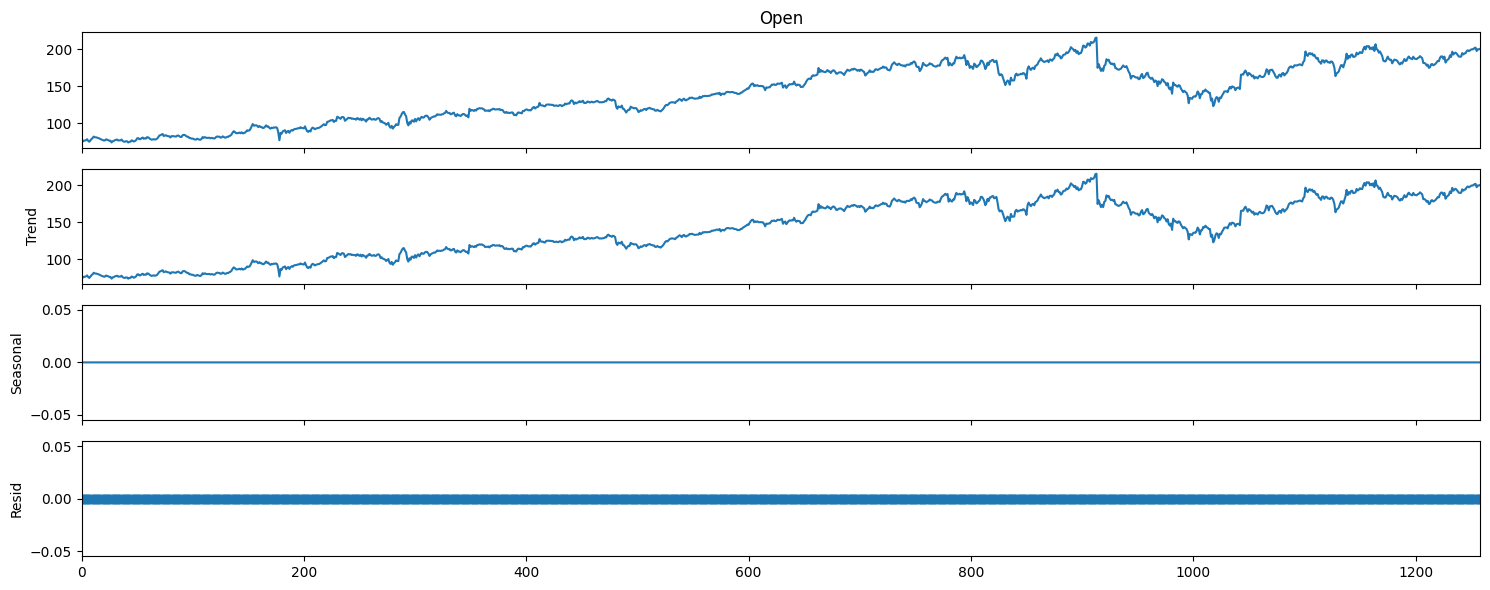

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(15,10))
result = seasonal_decompose(df['Open'], model='additive', period=1)
result.plot()
plt.show()

#Additive model on daily open price with period 1

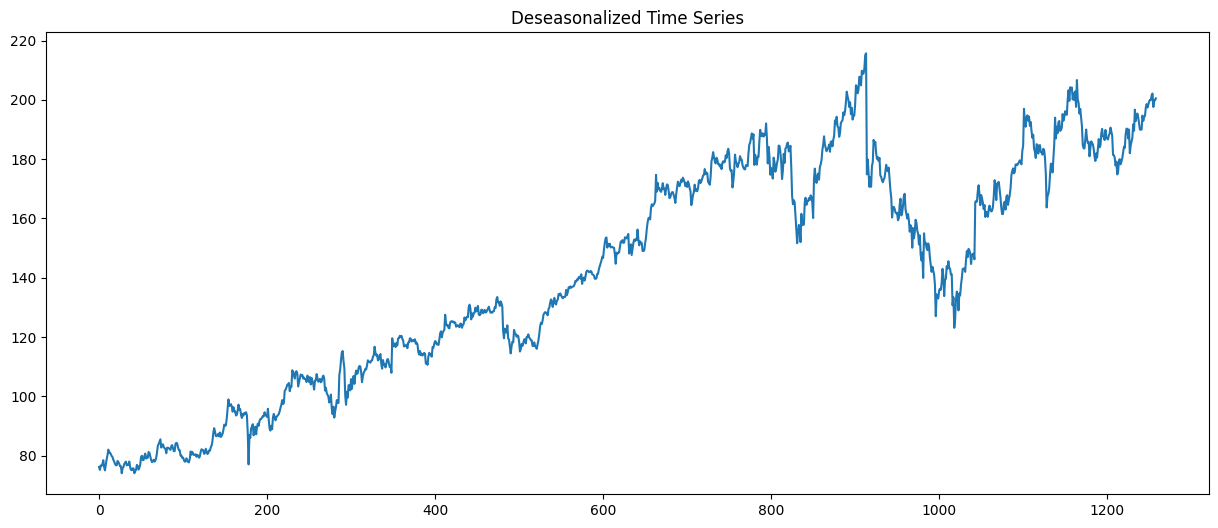

In [13]:
deseason = df['Open'] - result.seasonal
plt.figure(figsize=(15,6))
plt.plot(deseason)
plt.title('Deseasonalized Time Series')
plt.show()

#deseason addtitive model

<Figure size 1500x1000 with 0 Axes>

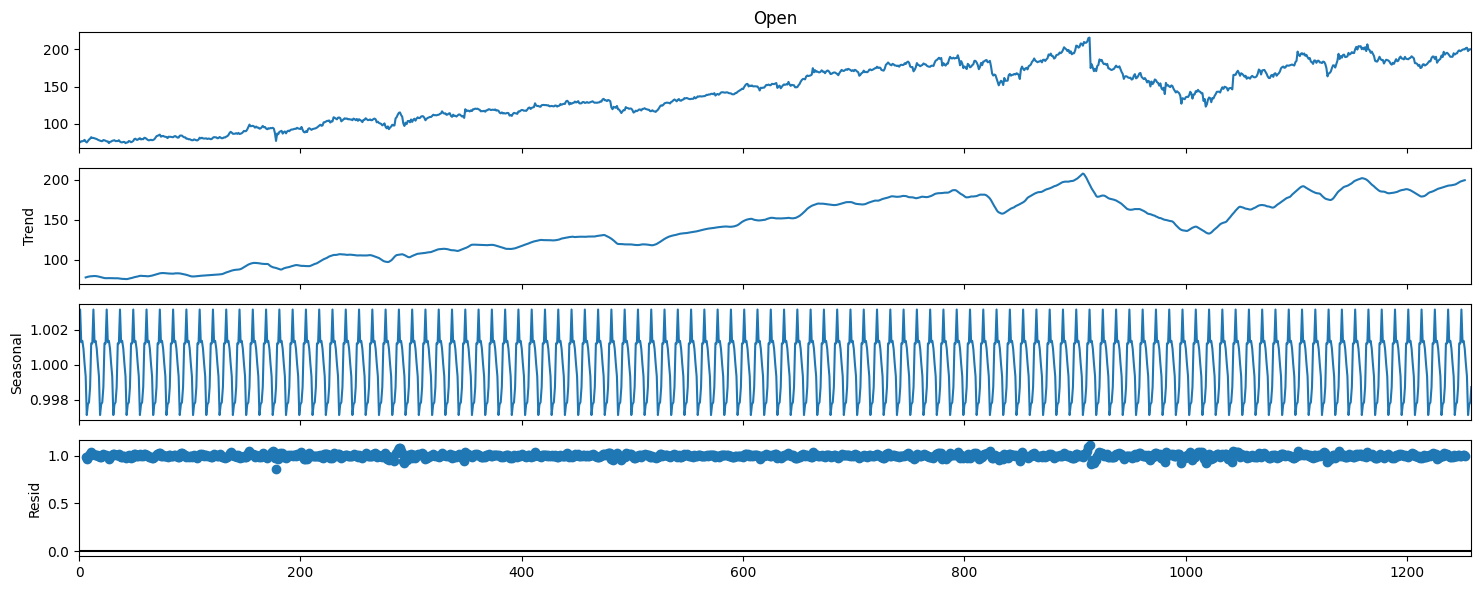

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(15,10))
result_mul = seasonal_decompose(df['Open'], model='multiplicative', period=12)
result_mul.plot()
plt.show()

#multiplicative model

<Figure size 1500x1000 with 0 Axes>

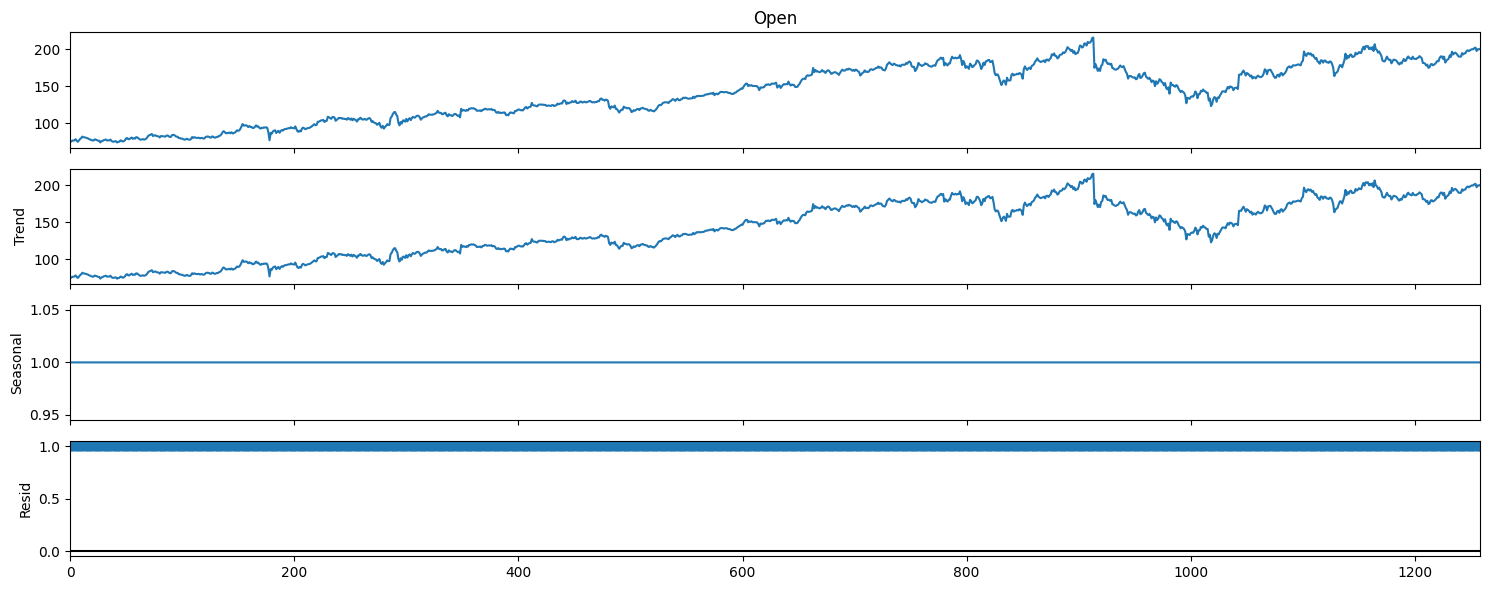

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(15,10))
result_mul = seasonal_decompose(df['Open'], model='multiplicative', period=1)
result_mul.plot()
plt.show()

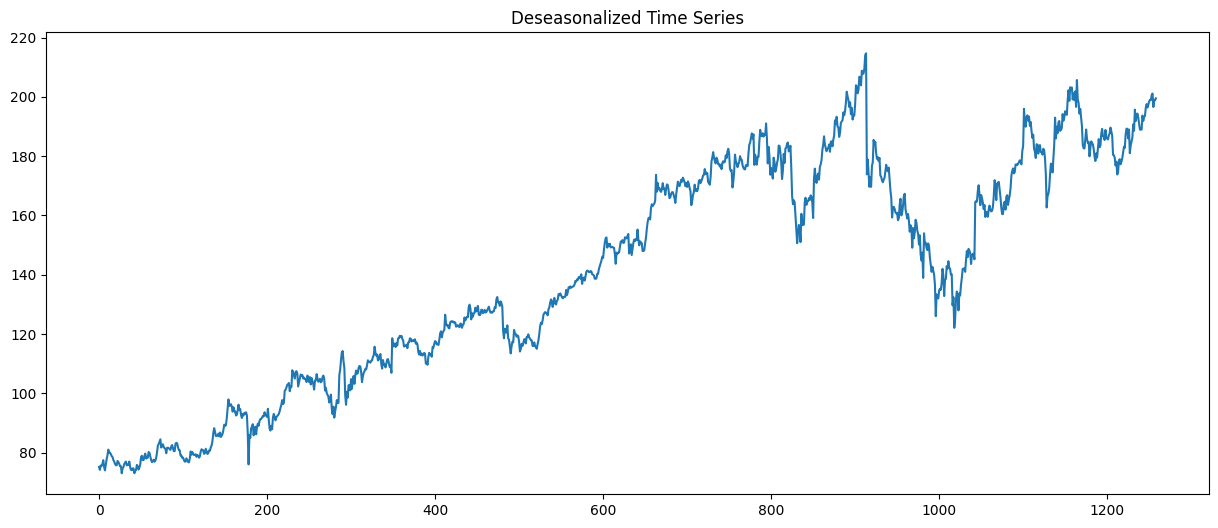

In [16]:
deseason_mul = df['Open'] - result_mul.seasonal
plt.figure(figsize=(15,6))
plt.plot(deseason_mul)
plt.title('Deseasonalized Time Series')
plt.show()

<Figure size 1500x1000 with 0 Axes>

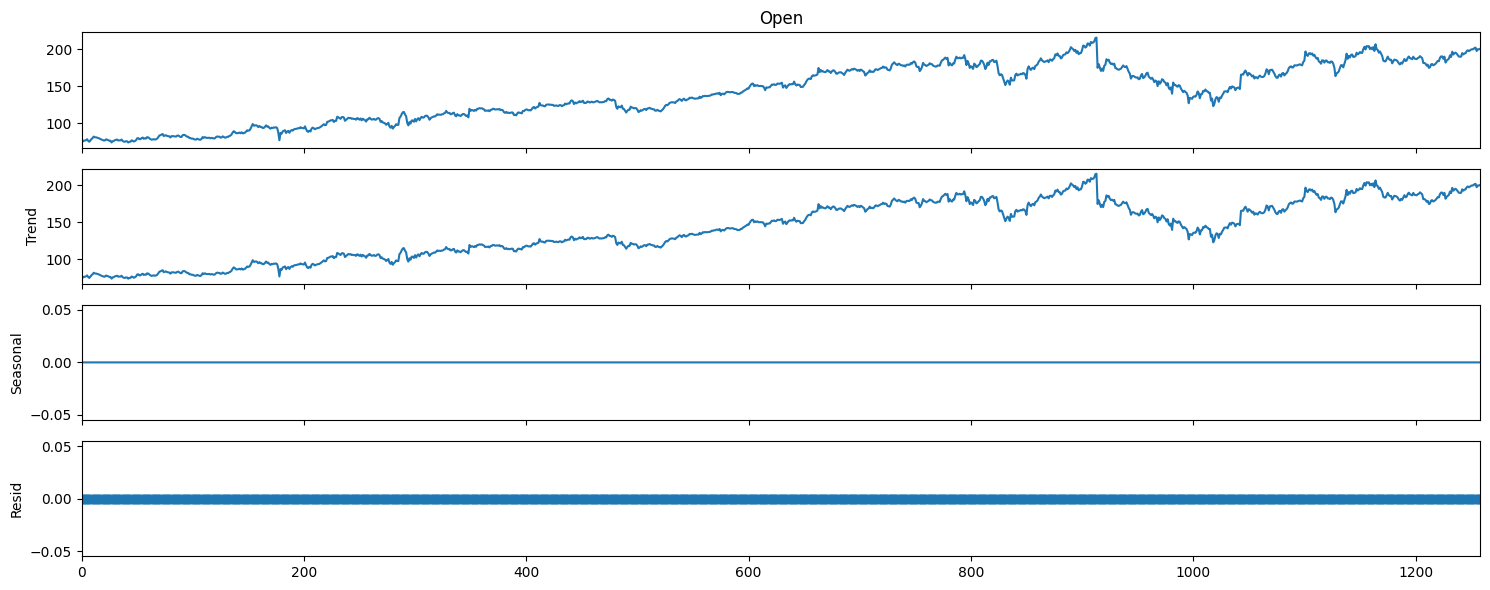

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(15,10))
result1 = seasonal_decompose(df['High'], model='additive', period=12)
result.plot()
plt.show()

<Figure size 1500x1000 with 0 Axes>

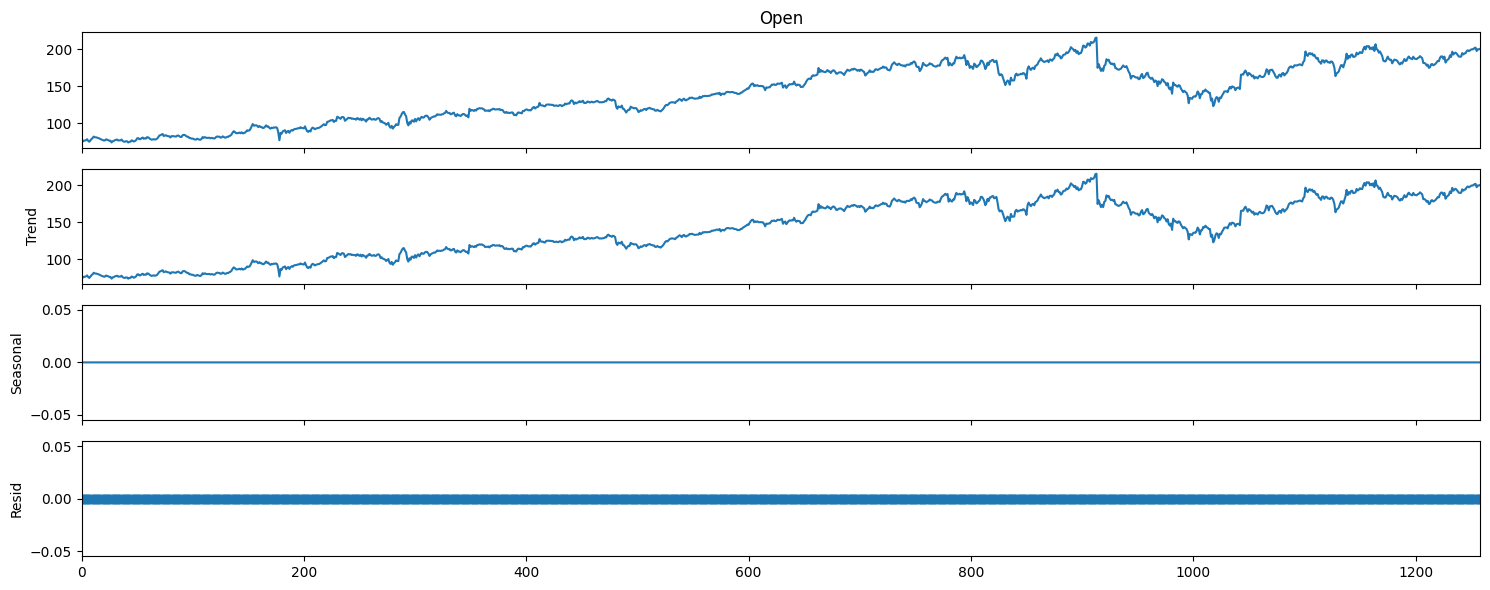

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(15,10))
result2 = seasonal_decompose(df['High'], model='additive', period=60)
result.plot()
plt.show()

## INSTAMBUL STOCK EXCHANGE

In [22]:
dataset = pd.read_excel('/content/istambul_stock_exchange.xlsx')
dataset.head()

,date,ISE,ISED,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
0,2009-01-05,0.035754,0.038376,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524
1,2009-01-06,0.025426,0.031813,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773
2,2009-01-07,-0.028862,-0.026353,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015
3,2009-01-08,-0.062208,-0.084716,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424
4,2009-01-09,0.009860,0.009658,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802


In [33]:
dataset.shape

(536, 10)

In [34]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 0 to 535
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     536 non-null    datetime64[ns]
 1   ISE      536 non-null    float64       
 2   ISED     536 non-null    float64       
 3   SP       536 non-null    float64       
 4   DAX      536 non-null    float64       
 5   FTSE     536 non-null    float64       
 6   NIKKEI   536 non-null    float64       
 7   BOVESPA  536 non-null    float64       
 8   EU       536 non-null    float64       
 9   EM       536 non-null    float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 42.0 KB


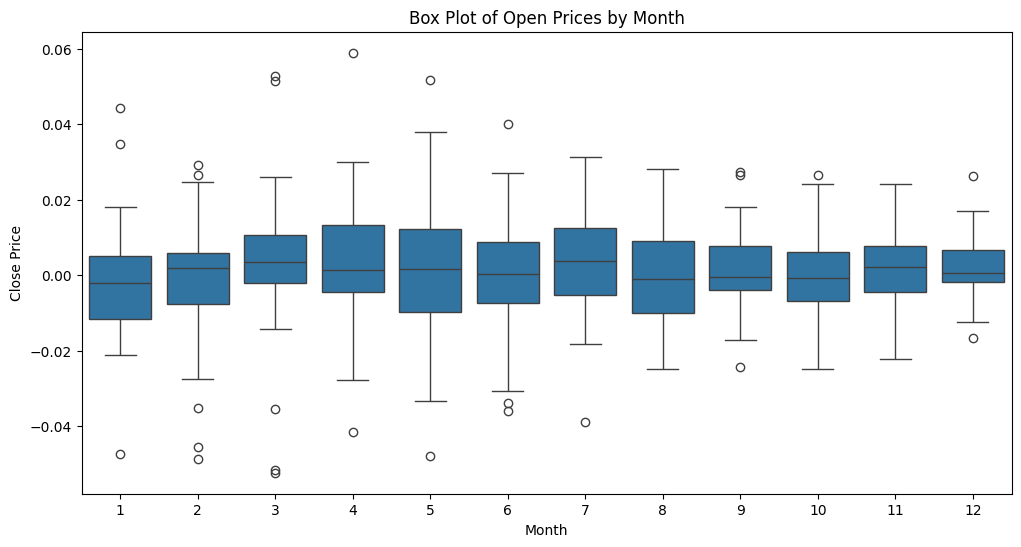

In [40]:
# Convert 'Date' column to datetime format if it's not already
dataset['date'] = pd.to_datetime(dataset['date'])

# Create new columns for day, month, and year
dataset['day'] = dataset['date'].dt.day
dataset['month'] = dataset['date'].dt.month
dataset['year'] = dataset['date'].dt.year

# Now, create a box plot for 'Open' prices by month or year
plt.figure(figsize=(12, 6))
sns.boxplot(x=dataset['month'], y=dataset['DAX'], data=dataset)

# Adding title and labels
plt.title('Box Plot of Open Prices by Month')
plt.xlabel('Month')
plt.ylabel('Close Price')

# Display the plot
plt.show()

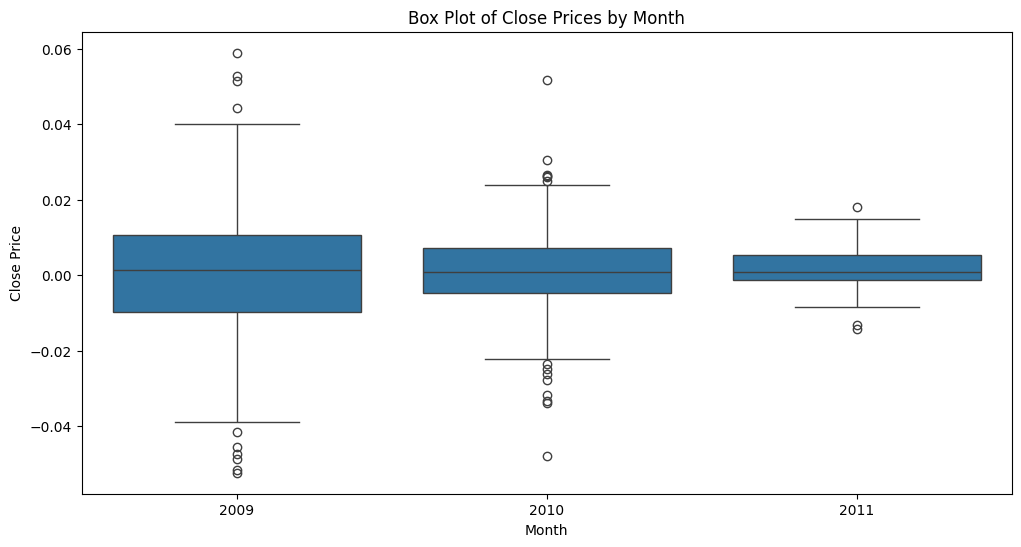

In [41]:
# Now, create a box plot for 'Close' prices by month or year
plt.figure(figsize=(12, 6))
sns.boxplot(x=dataset['year'], y=dataset['DAX'], data=dataset)

# Adding title and labels
plt.title('Box Plot of Close Prices by Month')
plt.xlabel('Month')
plt.ylabel('Close Price')

# Display the plot
plt.show()

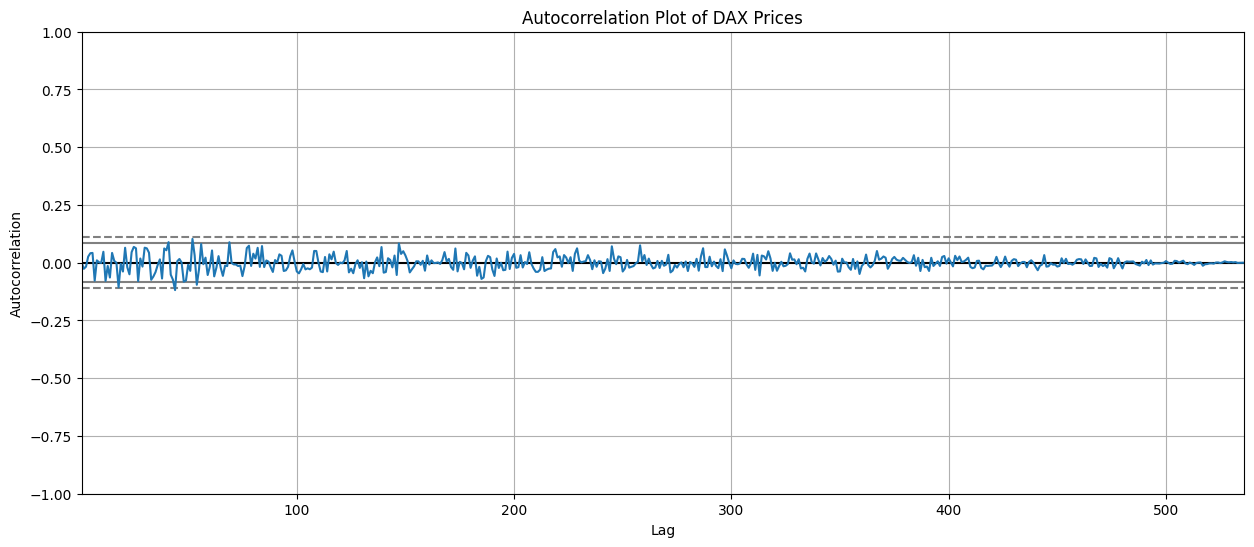

In [42]:
from pandas.plotting import autocorrelation_plot

plt.rcParams.update({'figure.figsize': (15, 6), 'figure.dpi': 100})
autocorrelation_plot(dataset['DAX'])

plt.title('Autocorrelation Plot of DAX Prices')
plt.show()

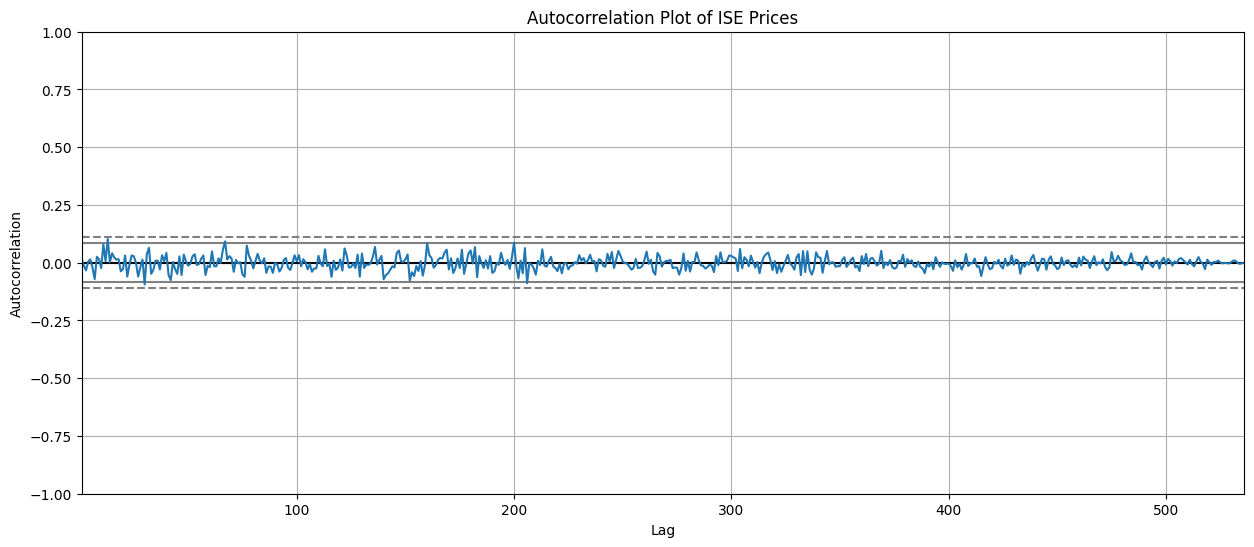

In [44]:
from pandas.plotting import autocorrelation_plot

plt.rcParams.update({'figure.figsize': (15, 6), 'figure.dpi': 100})
autocorrelation_plot(dataset['ISE'])

plt.title('Autocorrelation Plot of ISE Prices')
plt.show()

<Figure size 1500x1000 with 0 Axes>

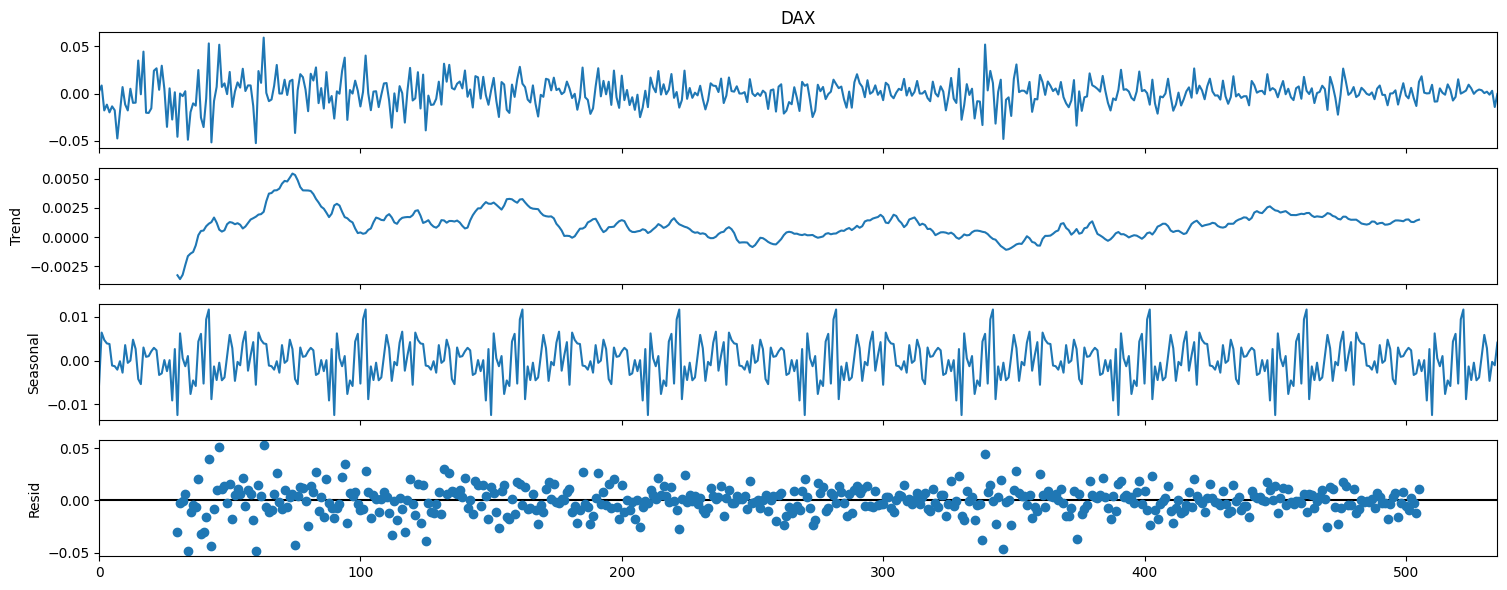

In [47]:
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(15,10))
result = seasonal_decompose(dataset['DAX'], model='additive', period=60)
result.plot()
plt.show()

<Figure size 1500x1000 with 0 Axes>

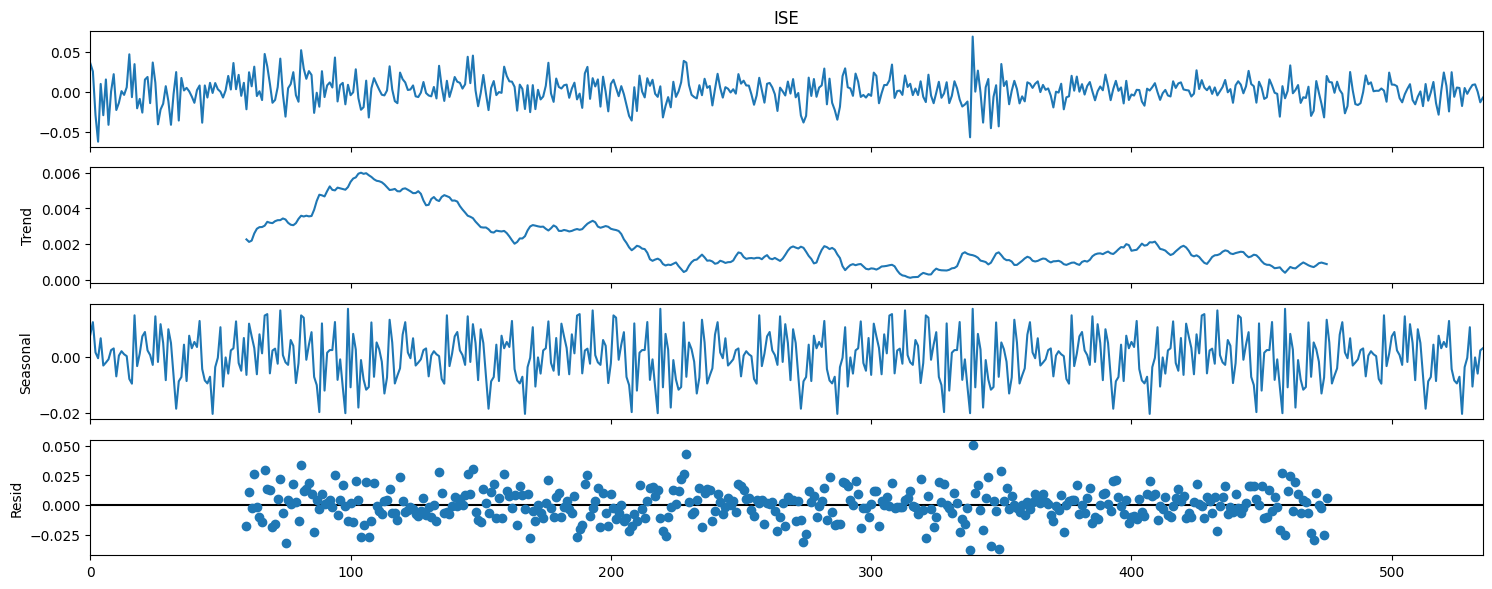

In [52]:
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(15,10))
result = seasonal_decompose(dataset['ISE'], model='additive', period=120)
result.plot()
plt.show()

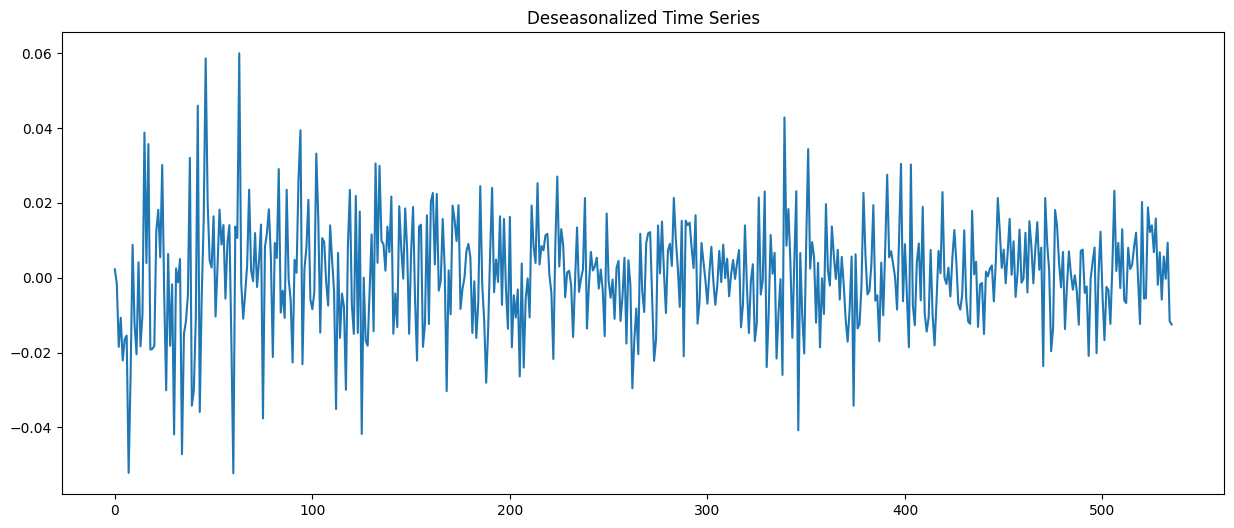

In [51]:
deseason_DAX = dataset['DAX'] - result.seasonal
plt.figure(figsize=(15,6))
plt.plot(deseason_DAX)
plt.title('Deseasonalized Time Series')
plt.show()